In [5]:
import networkx  as nx
import pandas as pd
import numpy as np


In [2]:
df = pd.read_pickle('../../Files/test0606_cross.pickle')

In [10]:
df.head()

,subreddit,subreddit_id,crosspost_parent,crosspost_parent_id,subreddit_subscribers,crosspost_parent_subs,count,crosspost_parent_num,total
0,Coronavirus,t5_2x4yx,CanadaCoronavirus,t5_2gpd6g,2365362.0,46292,1,1,1
1,DebateVaccines,t5_3jwf7,AntiVaxxers,t5_384mz,2354.5,27397,2,26,2
2,DebateVaccines,t5_3jwf7,ConspiracyUltra,t5_3flq3y,2608.4,223,20,20,20
3,DebateVaccines,t5_3jwf7,Coronavirus,t5_2x4yx,2585.5,2365057,4,5,8
4,DebateVaccines,t5_3jwf7,CoronavirusSupport,t5_2h4kok,2401.5,3115,2,19,5


In [7]:
G = nx.MultiDiGraph()

In [8]:
t = df['subreddit'].drop_duplicates().to_list()
t.extend(df['crosspost_parent'].drop_duplicates().to_list())
res = []
for i in t:
    if i not in res:
        res.append(i)
G.add_nodes_from(res)

In [15]:
e = df[['subreddit', 'crosspost_parent', 'count']].values.tolist()

In [18]:
G.add_weighted_edges_from(e)

In [19]:
G

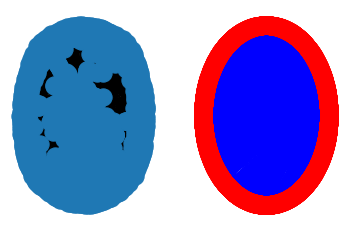

In [20]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

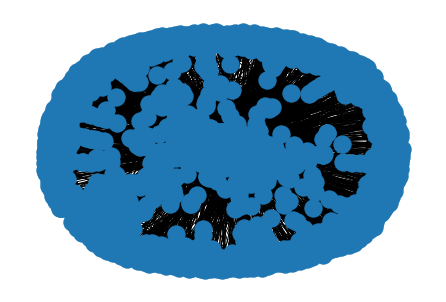

In [21]:
nx.draw(G)